# Import statements

In [1]:
import pandas as pd
import numpy as np
import scipy
import scipy.stats
#from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search


import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

C:\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


## Importing and preparing data

In [2]:
df = pd.read_csv('dailycrimes_weather_v1.csv', dtype="object")
df = df.apply(pd.to_numeric, errors='ignore')  # converted all numeric col into int/floats
df.dtypes

Day of Incident Date           object
weekday                        object
month                          object
weekend                         int64
public_holidays               float64
pub_holiday_sun                 int64
total_crimes                    int64
antinorcoticsact                int64
armsordinanceact                int64
attemptedmurder                 int64
beggingact                      int64
blindmurder                     int64
bulgery                         int64
carsnatching                    int64
cartheft                        int64
chequedishonour                 int64
dacoity                         int64
dacoitywithmurder               int64
electricityact                  int64
fatalaccident                   int64
gambling                        int64
gangrape                        int64
hurtpersonalfeud                int64
illegalextortion                int64
kidnapping                      int64
kidnappingminors                int64
localgovernm

In [3]:
weekday_dummies = pd.get_dummies(df.weekday, prefix='weekday_').iloc[:, 1:]
#print weekday_dummies
month_dummies = pd.get_dummies(df.month, prefix='month_').iloc[:, 1:]
df.head(10)

,Day of Incident Date,weekday,month,weekend,public_holidays,pub_holiday_sun,total_crimes,antinorcoticsact,armsordinanceact,attemptedmurder,...,MaxHumidity,MeanHumidity,MinHumidity,MaxVisibilityKm,MeanVisibilityKm,MinVisibilityKm,CloudCover,Events,Rain,Fog
0,1-Jan-14,Wednesday,January,0,NaN,0,357,26,23,5,...,93,69,45,6,4,3,NaN,0,0,0
1,2-Jan-14,Thursday,January,0,NaN,0,170,7,8,0,...,93,57,24,6,4,2,NaN,0,0,0
2,3-Jan-14,Friday,January,0,NaN,0,175,6,3,2,...,93,49,15,6,4,1,NaN,0,0,0
3,4-Jan-14,Saturday,January,1,NaN,0,176,4,5,4,...,87,61,34,4,4,1,NaN,0,0,0
4,5-Jan-14,Sunday,January,1,NaN,1,183,13,11,5,...,93,65,32,4,3,0,0.0,1,0,1
5,6-Jan-14,Monday,January,0,NaN,0,193,12,6,1,...,93,64,34,4,2,0,NaN,1,0,1
6,7-Jan-14,Tuesday,January,0,NaN,0,230,20,10,3,...,93,55,24,5,4,1,3.0,0,0,0
7,8-Jan-14,Wednesday,January,0,NaN,0,206,22,6,2,...,87,61,36,5,4,1,4.0,0,0,0
8,9-Jan-14,Thursday,January,0,NaN,0,223,27,10,1,...,93,58,31,6,5,4,2.0,0,0,0
9,10-Jan-14,Friday,January,0,NaN,0,209,10,12,0,...,87,68,48,5,3,1,2.0,0,0,0


In [4]:
weekday_dummies = pd.get_dummies(df.weekday, prefix='weekday_').iloc[:, 1:]
#print weekday_dummies
month_dummies = pd.get_dummies(df.month, prefix='month_').iloc[:, 1:]
print weekday_dummies.head(5)
print month_dummies.head(5)

months=list(month_dummies.columns.values)
weekdays= list(weekday_dummies.columns.values)


   weekday__Monday  weekday__Saturday  weekday__Sunday  weekday__Thursday  \
0                0                  0                0                  0   
1                0                  0                0                  1   
2                0                  0                0                  0   
3                0                  1                0                  0   
4                0                  0                1                  0   

   weekday__Tuesday  weekday__Wednesday  
0                 0                   1  
1                 0                   0  
2                 0                   0  
3                 0                   0  
4                 0                   0  
   month__August  month__December  month__February  month__January  \
0              0                0                0               1   
1              0                0                0               1   
2              0                0                0               1   
3    

In [5]:

df = pd.concat([df, weekday_dummies], axis=1)
df = pd.concat([df, month_dummies], axis=1)
df.dtypes

Day of Incident Date     object
weekday                  object
month                    object
weekend                   int64
public_holidays         float64
pub_holiday_sun           int64
total_crimes              int64
antinorcoticsact          int64
armsordinanceact          int64
attemptedmurder           int64
beggingact                int64
blindmurder               int64
bulgery                   int64
carsnatching              int64
cartheft                  int64
chequedishonour           int64
dacoity                   int64
dacoitywithmurder         int64
electricityact            int64
fatalaccident             int64
gambling                  int64
gangrape                  int64
hurtpersonalfeud          int64
illegalextortion          int64
kidnapping                int64
kidnappingminors          int64
localgovernment           int64
miscellaneous             int64
motorcyclesnatching       int64
motorcycletheft           int64
                         ...   
MaxTempe

## Preparing X, y for model


In [6]:
weather= ['MinTemperatureC','MaxHumidity','MeanVisibilityKm','Rain', 'Fog', 'Events']
# create X and y
feature_cols = ['pub_holiday_sun','weekend']
feature_cols.extend(weather)
feature_cols.extend(months)
feature_cols.extend(weekdays)
targets=['othervehicletheft', 'cartheft', 'motorcycletheft']
#print feature_cols
#print feature_cols
X = df[feature_cols]
y = df['othervehicletheft']

Spliting data into training and test

In [7]:
#randomly spliting data for train and test

X_train, X_test, y_train, y_test = train_test_split(\
    X, y, test_size=0.2, random_state=0)

est = GradientBoostingRegressor(n_estimators=5000, max_depth=6, learning_rate=0.05,
                                loss='huber', random_state=0)
est.fit(X_train, y_train)
print est.score(X_test, y_test)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, est.predict(X_test))
print('MAE: %.4f' % mae)


-0.569695072775
MAE: 1.2094


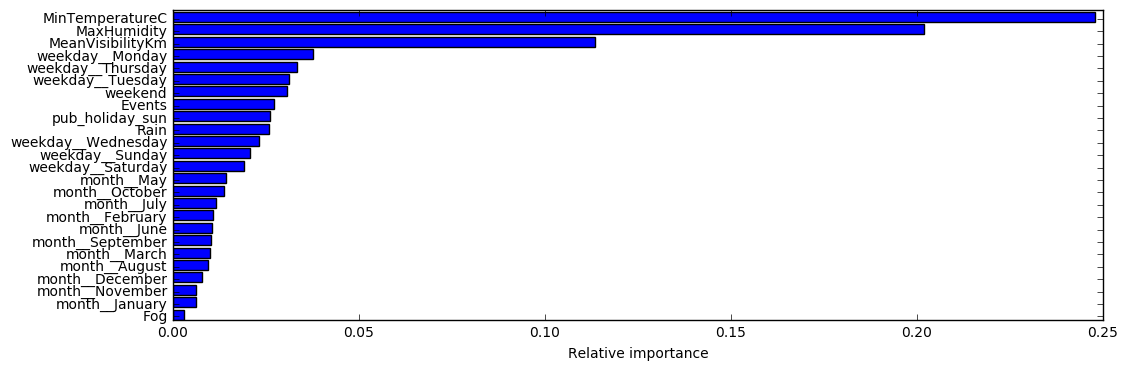

In [8]:
# sort importances
indices = np.argsort(est.feature_importances_)
# plot as bar chart
plt.barh(np.arange(len(feature_cols)), est.feature_importances_[indices])
plt.yticks(np.arange(len(feature_cols)) + 0.25, np.array(feature_cols)[indices])
_ = plt.xlabel('Relative importance')

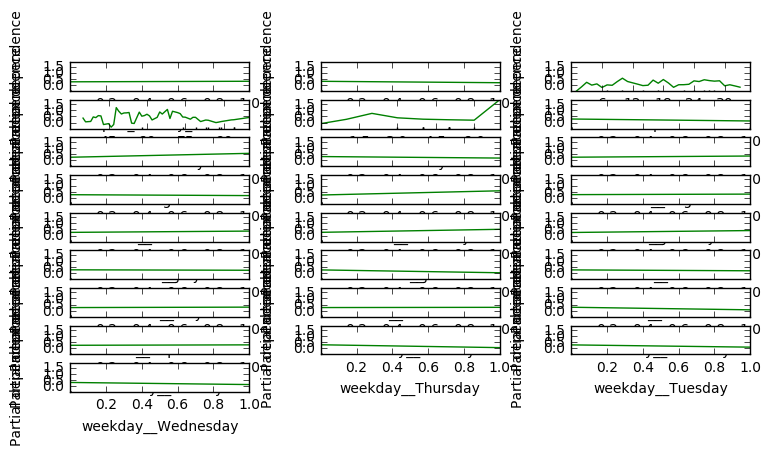

In [9]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence

fig, axs = plot_partial_dependence(est, X_train, feature_cols,
                                   feature_names=feature_cols, figsize=(8, 6))